In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


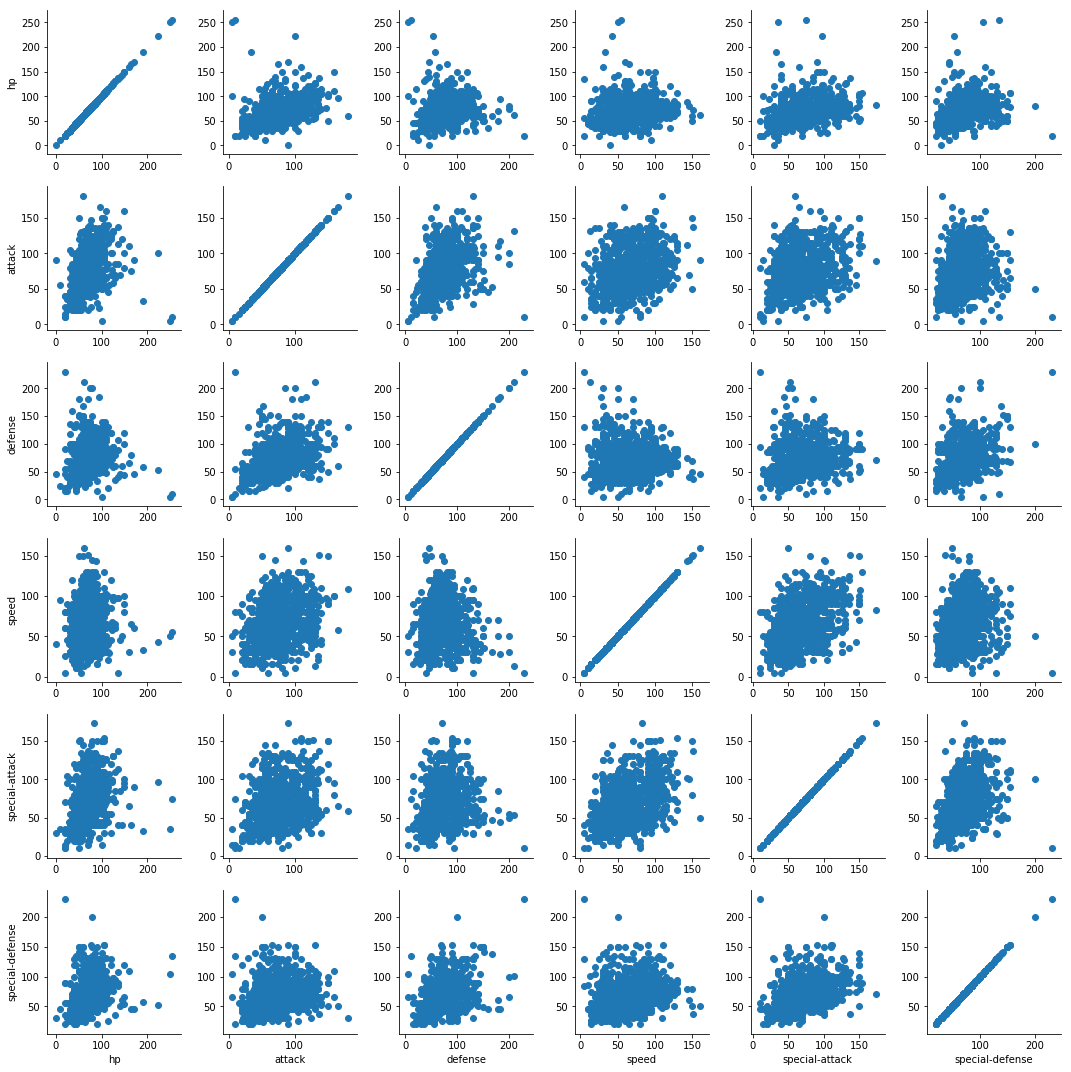

In [3]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats);
g.map(plt.scatter);

Every cell is in the plot, including those on the diagonals. These diagonals are just straight lines since the column and row variables are the same. 

Let's use the `map_diag` method to put histograms on the diagonal and change `map` to `map_offdiag` to plot scatterplots only on the off-diagonal cells.

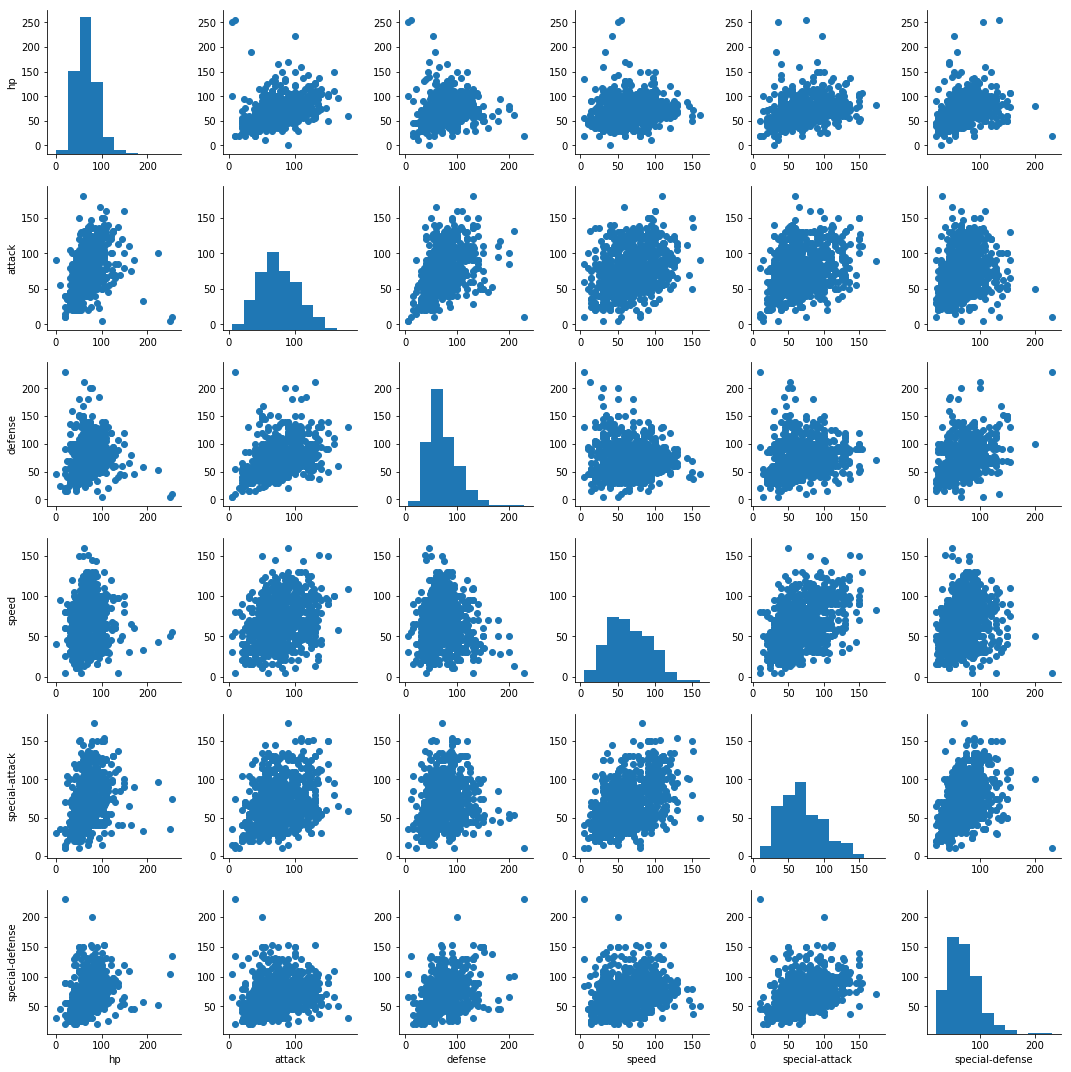

In [4]:
# Plot Matrix: Pokemon Stats
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

Looking at the plot matrix, we can see some relationships between `hp` vs. `attack`, `attack` vs. `defense`, and `special-attack` vs. `special-defense`. We can check that by plotting the correlations in a correlation heatmap.

In [5]:
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


The core function above returns a matrix of pairwise of correlations between selected variables. Put them in the `heatmap` function will produce the desired visualization.

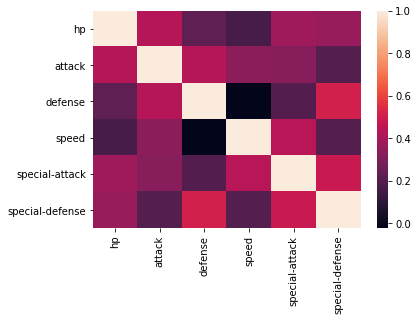

In [6]:
sb.heatmap(pokemon[pkmn_stats].corr());

Let's tweak the heatmap by adding some parameters: 
* reverse the color palette using `cmap`
* add annotations using `annot` 
* format the values with 2 decimal places using `fmt`
* set the lower bound of the color map using `vmin`

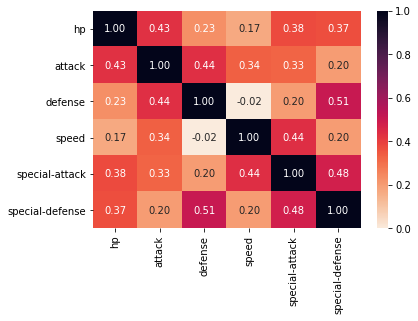

In [7]:
# Correlations Heatmap
sb.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0);